# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>

### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">As respostas devem ser dadas no Moodle, o notebook deve ser usado para executar código para obtenção dos resultados.</span>

---

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Questão 1)

São exemplos típicos de dados não estruturados sequenciais e espaciais:

<b>(a) sequencial: a coluna idade de uma tabela de uma base de dados relacional, ordenada de forma ascendente; espacial: mapa de calor de temperaturas em uma região </b><br>
(b) sequencial: valores de umidade relativa do ar obtidos em cidades diferentes de uma determinada região; espacial: os valores de uma tabela de base de dados relacional de compras<br>
(c) sequencial: valores de temperatura obtidos de hora em hora em um determinado dia e cidade; espacial: uma imagem de satélite<br>
(d) sequencial: quantidade de acessos à uma página web coletados a cada minuto; espacial: áudio capturado de uma sala de reuniões<br>

In [2]:
print('Neste caso, as sequencias são aplicadas á séries temporais, sinais, etc., já as espaciais podem estar relacionadas à imagens e mapas.')

Neste caso, as sequencias são aplicadas á séries temporais, sinais, etc., já as espaciais podem estar relacionadas à imagens e mapas.


### Questão 2)

Carregue os dados do arquivo `pollution.csv` utilizando o comando `pd.read_csv()`

Esse dataframe possui 3 colunas (0, 1 e 2) relativas a medição de monóxido de carbono durante 12 horas de dia em localidades de uma cidade, sendo que o primeiro deles (na primeira coluna) foi capturado em um mesmo bairro na periferia da cidade próximo à rodovia. Os outros dois não sabemos onde foram coletados, mas sabemos que um deles teve coleta em uma região central, e o outro também em uma região periférica.

Queremos identificar qual coluna (1 ou 2) mais se assemelha a primeira (0). Para isso, utilize a distância euclidiana e um vetor de características composto de:
* Entropia da energia (com 12 blocos)
* Entropia espectral (com 12 blocos)
* Centróide espectral (considere frequência = 0.2Hz)
* Dispersão espectral (considere frequência = 0.2Hz)

Qual coluna é a mais semelhante, e quando consideramos a comparação da coluna 0 com essa mais semelhante, qual feature (individualmente) apresentou a menor distância Euclidiana?

(a) Coluna 2, Feature Entropia da Energia<br>
<b>(b) Coluna 1, Feature Centróide espectral</b><br>
(c) Coluna 2, Feature Dispersão espectral<br>
(d) Coluna 1, Feature Entropia espectral<br>

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('.\data\pollution.csv')

#Função dos descritores de sinais

def entropia_energia(sinal, n_blocos=10): #entropia de energia
    '''Entropia da energia do sinal'''
    energia_sinal = np.sum(sinal ** 2) # energia total 
    M = len(sinal) #tamanho do sinal
    M_janelas = int(np.floor(M / n_blocos)) # calcula janelas dentro do sinal
    if M != M_janelas * n_blocos: # verifica se tamanho dos blocos é multiplo do tamanho do sinal
        sinal = sinal[0:M_janelas * n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy() # monta matriz [M_janelas x n_blocos]
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001) # Computa energias de cada janela (normalizada pela do sinal)
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001)) # Computa entropia entre energias das janelas
    return entropia

def entropia_espectral(sinal, n_blocos=16): #entropia espectral
    """Computes the spectral entropy"""
    fft_abs = np.abs(np.fft.fft(sinal)) #calcula a transformada de fourier para o sinal
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)
    return entropia_esp

def centroide_dispersao_espectral(sinal, tx_amostragem): #centróide espectral e centróide de dispersão espectral
    '''Calcula o centro de massa e dispersão do espectro do sinal'''
    fft_abs = np.abs( np.fft.fft(sinal) )
    N = len(fft_abs)
    ind = (np.arange(1, N+1)) * (tx_amostragem / (2.0*N)) # indices de frequencia

    # calcula a distribuicao do espectro normalizando para soma unitária
    Xt = fft_abs.copy()
    Xt = Xt / Xt.max()
    NUM = np.sum(ind * Xt)
    DEN = np.sum(Xt) + 0.0001 

    # Centroide:
    centroide = (NUM / DEN)

    # Dispersão:
    dispersao = np.sqrt(np.sum(((ind - centroide) ** 2) * Xt) / DEN)

    # Normalizando:
    centroid = centroide / (tx_amostragem / 2.0)
    dispersao = dispersao / (tx_amostragem / 2.0)

    return centroide, dispersao


#Calculando distâncias para comparação com a coluna 0 com as colunas 1 e 2
entr_ener0 = entropia_energia(data['carbon_monoxide_A'].values)
entr_espc0 = entropia_espectral(data['carbon_monoxide_A'].values)
cent_espc0 = np.round(centroide_dispersao_espectral(data['carbon_monoxide_A'].values, 0.2)[0],6)
cent_disp0 = np.round(centroide_dispersao_espectral(data['carbon_monoxide_A'].values, 0.2)[1],6)

entr_ener1 = entropia_energia(data['carbon_monoxide_B'].values)
entr_espc1 = entropia_espectral(data['carbon_monoxide_B'].values)
cent_espc1 = np.round(centroide_dispersao_espectral(data['carbon_monoxide_B'].values, 0.2)[0],6)
cent_disp1 = np.round(centroide_dispersao_espectral(data['carbon_monoxide_B'].values, 0.2)[1],6)

entr_ener2 = entropia_energia(data['carbon_monoxide_C'].values)
entr_espc2 = entropia_espectral(data['carbon_monoxide_C'].values)
cent_espc2 = np.round(centroide_dispersao_espectral(data['carbon_monoxide_C'].values, 0.2)[0],6)
cent_disp2 = np.round(centroide_dispersao_espectral(data['carbon_monoxide_C'].values, 0.2)[1],6)

print('Coluna 0 - carbon_monoxide_A (Referência):')
print("Entropia de Energia =", entr_ener0)
print("Entropia Espectral =", entr_espc0)
print("Centroide Espectral =", cent_espc0)
print("Dispersão Espectral =", cent_disp0)
print()
print('Coluna 1 - carbon_monoxide_B:')
print("Entropia de Energia =", entr_ener1)
print("Entropia Espectral =", entr_espc1)
print("Centroide Espectral =", cent_espc1)
print("Dispersão Espectral =", cent_disp1)
print()
print('Coluna 2 - carbon_monoxide_C:')
print("Entropia de Energia =", entr_ener2)
print("Entropia Espectral =", entr_espc2)
print("Centroide Espectral =", cent_espc2)
print("Dispersão Espectral =", cent_disp2)
print()

#feature com a maior proximidade da coluna 0 e 1:

def Euclidean_distance(A, B): #método distância euclidiana
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

dist_entr_ener = np.sqrt((entr_ener0 - entr_ener1)**2) 
dist_entr_espc = np.sqrt((entr_espc0 - entr_espc1)**2)
dist_cent_espc = np.sqrt((cent_espc0 - cent_espc1)**2)
dist_cent_disp = np.sqrt((cent_disp0 - cent_disp1)**2)

dist_entr_ener2 = np.sqrt((entr_ener0 - entr_ener2)**2) 
dist_entr_espc2 = np.sqrt((entr_espc0 - entr_espc2)**2)
dist_cent_espc2 = np.sqrt((cent_espc0 - cent_espc2)**2)
dist_cent_disp2 = np.sqrt((cent_disp0 - cent_disp2)**2)

print('Feature com menor distância entre coluna 0 e 1:')
print("Distância Entropia de Energia =", dist_entr_ener)
print("Distância Entropia Espectral =", dist_entr_espc)
print("Distância Centroide Espectral =", dist_cent_espc)
print("Distância Dispersão Espectral =", dist_cent_disp)
print()
print('Feature com menor distância entre coluna 0 e 2:')
print("Distância Entropia de Energia =", dist_entr_ener2)
print("Distância Entropia Espectral =", dist_entr_espc2)
print("Distância Centroide Espectral =", dist_cent_espc2)
print("Distância Dispersão Espectral =", dist_cent_disp2)


print()
print()
print('Resposta: A coluna 1 é a que mais se assemelha à coluna 0. A feature mais próxima foi a Centróide Espectral')

Coluna 0 - carbon_monoxide_A (Referência):
Entropia de Energia = 2.9264460330536877
Entropia Espectral = 0.5258138711655238
Centroide Espectral = 0.045258
Dispersão Espectral = 0.448172

Coluna 1 - carbon_monoxide_B:
Entropia de Energia = 3.002154209972769
Entropia Espectral = 0.501926032688818
Centroide Espectral = 0.045222
Dispersão Espectral = 0.447822

Coluna 2 - carbon_monoxide_C:
Entropia de Energia = 3.2086136224733726
Entropia Espectral = 0.5046205554355789
Centroide Espectral = 0.045986
Dispersão Espectral = 0.44777

Feature com menor distância entre coluna 0 e 1:
Distância Entropia de Energia = 0.07570817691908127
Distância Entropia Espectral = 0.023887838476705836
Distância Centroide Espectral = 3.600000000000131e-05
Distância Dispersão Espectral = 0.00035000000000001696

Feature com menor distância entre coluna 0 e 2:
Distância Entropia de Energia = 0.2821675894196849
Distância Entropia Espectral = 0.021193315729944873
Distância Centroide Espectral = 0.0007279999999999995
D

### Questão 3)

Carrege as imagens da base de dados `lfw_subset` contida na biblioteca `skimage`, conforme código abaixo. As 100 primeiras imagens são imagens de faces, utilize apenas essas, desconsiderando as demais.

Vamos utilizar o método LBP (com parâmetros conforme visto nos exercícios) e a distância Euclidiana para comparar faces dessa base de dados.

Utilizando como imagem de consulta a imagem 45 da lista,  e os seguintes parâmetros para o LBP:
* points = 8
* radius = 1
* n_bins = 10

Retorne as 5 imagens mais similares (excluindo a de consulta). Quais são os índices dessas imagens?

(a) 0, 1, 45, 77, 81<br>
(b) 39, 30, 77,  0, 81<br>
(c) 1, 99, 81,  0, 11<br>
<b>(d)1, 39, 77, 0, 81</b></font>

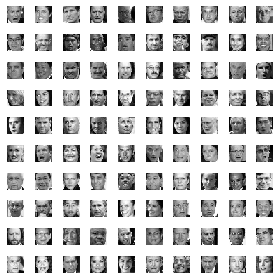

In [67]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import feature
from skimage import data

fig, axes = plt.subplots(10, 10, figsize=(4, 4))
ax = axes.ravel()
imgs = data.lfw_subset()
# mostrando as 16 primeiras imagens
for i in range(100):
    ax[i].imshow(imgs[i], cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()

In [139]:
import pandas as pd
from skimage import feature

def lbp_features(img, points=8, radius=1, n_bins=10):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

def Euclidean_distance(A, B): #método distância euclidiana
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

dE = []

for i in range(100):
        dE.append([Euclidean_distance(lbp_features(imgs[45]),lbp_features(imgs[i]))])
        
data = pd.DataFrame(dE,columns=['rank_dist_img45'])

data = data.drop([45]) #preciso dropar o índice 45, pois neste caso, é a distância dele com ele mesmo.

print(data.sort_values(by='rank_dist_img45',ascending=True)[:5])

    rank_dist_img45
1          0.022627
39         0.024684
77         0.025399
0          0.027989
81         0.028889


### Questão 4)

Vamos utilizar o método LBP (com parâmetros conforme visto nos exercícios) e a distância Euclidiana para comparar faces na mesma base de dados utilizada na questão anterior. Porém agora vamos calcular dois descritores LBP, cada qual com parâmetros diferentes, concatená-los e utilizar esse vetor concatenado para recuperar imagens similares.

Vetor LBP 1:
* points = 8
* radius = 1
* n_bins = 10

Vetor LBP 2:
* points = 16
* radius = 3
* n_bins = 18

Utilizando como imagem de consulta a imagem 45 da lista, retorne as 5 imagens mais similares (excluindo a de consulta). Essas características com a imagem de consulta utilizada representou bem imagens com uma característica facial específica. Qual é essa característica?

(a) Pessoas de óculos<br>
(b) Mulheres brancas<br>
(c) Mulheres com cabelo de cor escura<br>
<b>(d) Pessoas sorrindo</b><br>

    rank_dist2_img45
0           0.056251
1           0.056974
86          0.057778
11          0.058962
23          0.059178

Resposta: As imagens apresentam pessoas sorrindo.


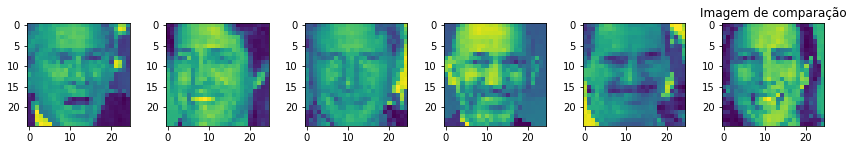

In [170]:
dEC = []

lbp45_concat = np.concatenate((lbp_features(imgs[45]),lbp_features(imgs[45],16,3,18)))

for i in range(100):
        lbp_concat = np.concatenate((lbp_features(imgs[i]),lbp_features(imgs[i],16,3,18)))
        dEC.append([Euclidean_distance(lbp45_concat,lbp_concat)])

data2 = pd.DataFrame(dEC,columns=['rank_dist2_img45'])

data2 = data2.drop([45]) #preciso dropar o índice 45, pois neste caso, é a distância dele com ele mesmo.

print(data2.sort_values(by='rank_dist2_img45',ascending=True)[:5])


fig, axes = plt.subplots(1, 6, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(imgs[0])
ax[1].imshow(imgs[1])
ax[2].imshow(imgs[86])
ax[3].imshow(imgs[11])
ax[4].imshow(imgs[23])
plt.title('Imagem de comparação')
ax[5].imshow(imgs[45])

fig.tight_layout()
print()
print('Resposta: As imagens apresentam pessoas sorrindo.')

### Questão 5)
 
Considere as seguintes afirmações sobre o método Bag-of-features:

I - um *framework* para aprender características com base nos dados e que pode ser aplicado em dados não estruturados como texto, sinais, imagens e vídeo.<font color='green'><b>V</b></font><br>
II - um método de descrição de dados não estruturados por meio do PCA.<font color='red'><b>F</b></font><br>
III - permite obter características que podem ser utilizadas em tarefas como: recuperação de informação, agrupamento e classificação<font color='green'><b>V</b></font><br>
IV - o tamanho do dicionário é um dos parâmetros mais relevantes e, em geral, quanto maior puder ser definido com base na capacidade computacional, melhores serão os resultados.<font color='red'><b>F</b></font><br>
V - pode-se utilizar qualquer extrator de características como base para uso no Bag-of-Features.<font color='green'><b>V</b></font><br>
VI - uma desvantagem do método é o número de escolhas possíveis a definir em cada etapa, as quais exigem uma busca pelos melhores parâmetros.<font color='green'><b>V</b></font><br>

São verdadeiras as afirmações:

(a) I, II, III e V<br>
<b>(b) I, III, V e VI</b><br>
(c) I, III, IV, V e VI<br>
(d) I, III, IV, V<br>